#### Part 3 Exercise 2

In [1]:
import pandas as pd
from ast import literal_eval
from itertools import combinations

import networkx as nx
import netwulf as nw

In [2]:
df_papers = pd.read_csv('../Week_3/data/PaperDataset.csv')
df_authors = pd.read_csv('../Week_3/data/AuthorDataframe.csv')

paper_connection_list = [literal_eval(lst) for lst in df_papers.authorIds.values]
author_ids = list(set([int(value) for value in df_authors["AuthorID"].values]))

In [3]:
from collections import defaultdict

pairing_dict = defaultdict(int)
for lst in paper_connection_list:
    combi = combinations(lst, 2)
    try: combi = set([(int(i[0]), int(i[1])) for i in combi if int(i[0]) < int(i[1])])
    except: continue
    for pair in combi: pairing_dict[pair] += 1
weighted_edges = [(pair[0], pair[1], w) for pair, w in pairing_dict.items()]

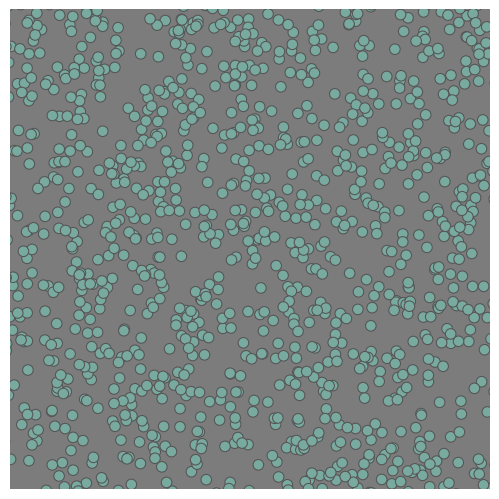

In [4]:
G = nx.Graph()
G.add_nodes_from(author_ids)
G.add_weighted_edges_from(weighted_edges)

stylized_network, config = nw.visualize(G)
nw.save("Graph.json", stylized_network, config, G)

In [20]:
stylized_network, config, G = nw.load("Graph.json")
nw.visualize(G)

(None, None)

(<Figure size 480x480 with 1 Axes>, <Axes: >)

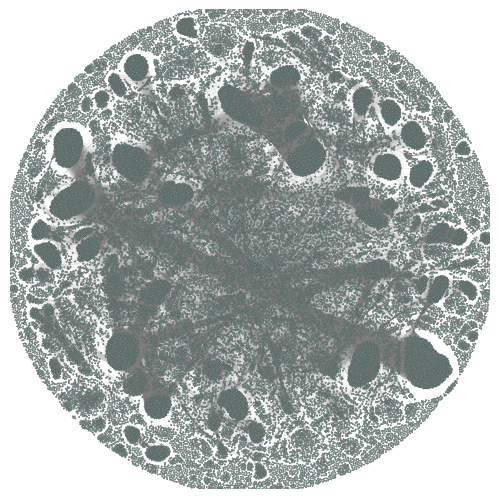

In [7]:
# nw.draw_netwulf(stylized_network, config)